# 🗳️ Prédiction des Élections Présidentielles - Validation Temporelle

## 🎯 Objectif
Ce notebook utilise une approche de validation temporelle pour prédire les résultats d'élections présidentielles françaises à partir de données socio-économiques et politiques.

- **Validation temporelle** : entraînement sur le passé, test sur le futur (scénario réaliste de prédiction)

## 📊 Données
- **Années** : 1995, 2002, 2007, 2012, 2017, 2022
- **Variables** : Taux criminalité, chômage, défaillances entreprises, clivage politique
- **Cible** : Gagnant tour 1 et tour 2 par département

## ⚠️ Pourquoi la validation temporelle ?
La validation temporelle simule une vraie situation de prédiction électorale : on entraîne le modèle sur les années passées et on prédit sur une année future (ex : 2022). Cela évite tout risque de fuite de données et donne une évaluation honnête des performances du modèle.

---

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Chargement des données
# (adapter le chemin si besoin)
df = pd.read_csv("../data/merged_data/data_merged_by_year.csv", sep=",")

print("📊 Aperçu des données disponibles:")
print(f"Années disponibles: {sorted(df['Année'].unique())}")
print(f"Nombre total d'observations: {len(df)}")
print(f"Départements: {df['Libellé du département'].nunique()}")

# Encodage One-Hot pour 'Clivage'
one_hot = OneHotEncoder()
clivage_encoded = one_hot.fit_transform(df['Clivage'].values.reshape(-1,1)).toarray()
categories = one_hot.categories_[0]
clivage_df = pd.DataFrame(clivage_encoded, columns = ["Clivage_"+str(category) for category in categories])
df = pd.concat([df, clivage_df], axis=1)

years = sorted(df['Année'].unique())

📊 Aperçu des données disponibles:
Années disponibles: [np.int64(1995), np.int64(2002), np.int64(2007), np.int64(2012), np.int64(2017), np.int64(2022)]
Nombre total d'observations: 840
Départements: 12


Gagnant tour 1:

## Validation temporelle : principe

Nous utilisons une validation temporelle stricte :
- On entraîne le modèle sur toutes les années < année de test
- On teste sur l'année cible (ex : 2022)

Cela simule une vraie prédiction électorale, sans fuite d'information du futur vers le passé.

📊 Aperçu des données disponibles:
Année disponibles: [np.int64(1995), np.int64(2002), np.int64(2007), np.int64(2012), np.int64(2017), np.int64(2022)]
Nombre total d'observations: 840
Départements: 12

🎯 VALIDATION TEMPORELLE - Prédiction Tour 1
📚 Entraînement sur: [1995, 2002, 2007, 2012, 2017] (696 observations)
🧪 Test sur: 2022 (144 observations)
🎯 Précision validation temporelle (Tour 1): 0.92
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       132
           1       0.00      0.00      0.00        12

    accuracy                           0.92       144
   macro avg       0.46      0.50      0.48       144
weighted avg       0.84      0.92      0.88       144



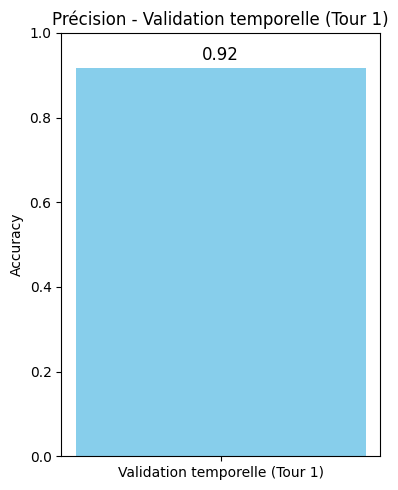

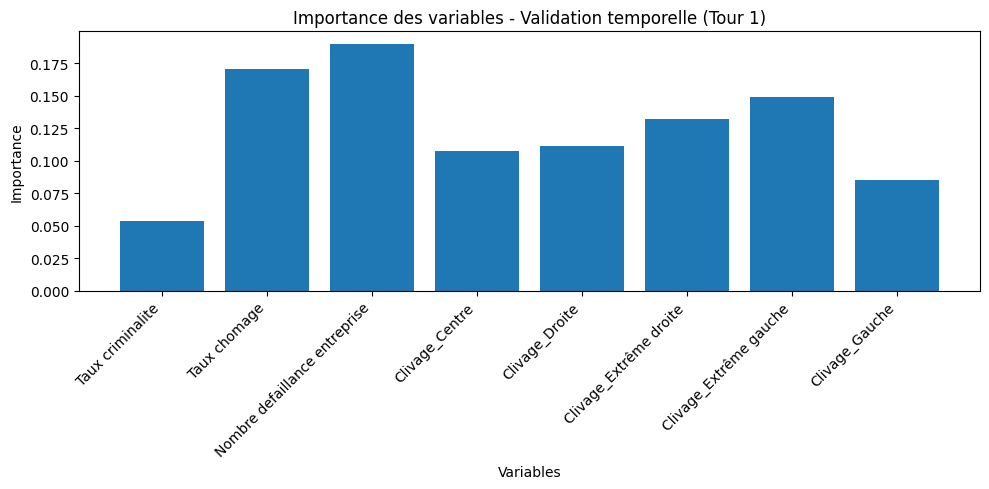

In [25]:
# Chargement des données avec le bon chemin
df = pd.read_csv("../data/merged_data/data_merged_by_year.csv", sep=",")

print("📊 Aperçu des données disponibles:")
print(f"Année disponibles: {sorted(df['Année'].unique())}")
print(f"Nombre total d'observations: {len(df)}")
print(f"Départements: {df['Libellé du département'].nunique()}")

# Encodage One-Hot pour 'Clivage'
one_hot = OneHotEncoder()
clivage_encoded = one_hot.fit_transform(df['Clivage'].values.reshape(-1,1)).toarray()
categories = one_hot.categories_[0]
clivage_df = pd.DataFrame(clivage_encoded, columns = ["Clivage_"+str(category) for category in categories])
df = pd.concat([df, clivage_df], axis=1)

# VALIDATION TEMPORELLE - Prédiction Tour 1
print("\n🎯 VALIDATION TEMPORELLE - Prédiction Tour 1")
print("="*50)

# Entraînement sur les années 1995-2017, test sur 2022
train_years = [1995, 2002, 2007, 2012, 2017]
test_year = 2022

df_train = df[df['Année'].isin(train_years)]
df_test = df[df['Année'] == test_year]

print(f"📚 Entraînement sur: {train_years} ({len(df_train)} observations)")
print(f"🧪 Test sur: {test_year} ({len(df_test)} observations)")

# Sélection des caractéristiques
feature_cols = ['Taux criminalite', 'Taux chomage', 'Nombre defaillance entreprise'] + list(clivage_df.columns)
X_train = df_train[feature_cols]
y_train = df_train['Gagnant tour 1']
X_test = df_test[feature_cols]
y_test = df_test['Gagnant tour 1']  # Correction: doit être 'Gagnant tour 1'

# Création et entraînement du modèle
model_temporal = RandomForestClassifier(random_state=42, n_estimators=100)
model_temporal.fit(X_train, y_train)

# Prédiction et évaluation
y_pred_temporal = model_temporal.predict(X_test)
accuracy_temporal = accuracy_score(y_test, y_pred_temporal)

print(f"🎯 Précision validation temporelle (Tour 1): {accuracy_temporal:.2f}")
print(classification_report(y_test, y_pred_temporal, zero_division=0))

# Affichage de l'accuracy (Tour 1)
plt.figure(figsize=(4, 5))
plt.bar(['Validation temporelle (Tour 1)'], [accuracy_temporal], color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Précision - Validation temporelle (Tour 1)')
plt.text(0, accuracy_temporal + 0.02, f'{accuracy_temporal:.2f}', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# Affichage de l'importance des variables (Tour 1)
importances = model_temporal.feature_importances_
feature_names = X_train.columns
plt.figure(figsize=(10, 5))
plt.bar(feature_names, importances)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Importance des variables - Validation temporelle (Tour 1)')
plt.tight_layout()
plt.show()

Gagnant tour 2:

## Validation temporelle : Tour 2

Même principe que pour le tour 1, mais la cible est le gagnant du second tour par département.

🎯 VALIDATION TEMPORELLE - Prédiction Tour 2
📚 Entraînement Tour 2 sur: [1995, 2002, 2007, 2012, 2017] (696 observations)
🧪 Test Tour 2 sur: 2022 (144 observations)
🎯 Précision validation temporelle Tour 2: 0.97

🔄 VALIDATION CROISÉE TEMPORELLE - Tour 2
📅 Entraînement: [np.int64(1995), np.int64(2002), np.int64(2007), np.int64(2012), np.int64(2017)] → Test: 2022 → Précision: 0.97
🎯 Précision validation temporelle (Tour 2): 0.97
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       132
           1       0.83      0.83      0.83        12

    accuracy                           0.97       144
   macro avg       0.91      0.91      0.91       144
weighted avg       0.97      0.97      0.97       144

🎯 Précision validation temporelle (Tour 2): 0.97
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       132
           1       0.83      0.83      0.83        12

    accuracy                  

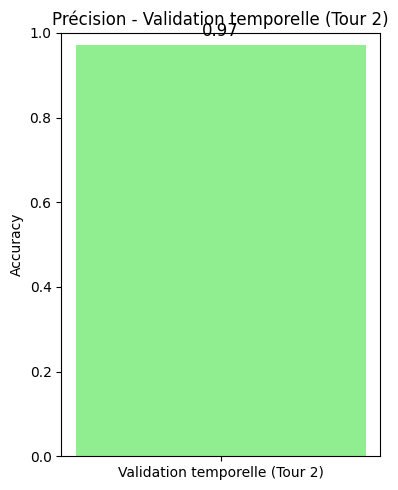

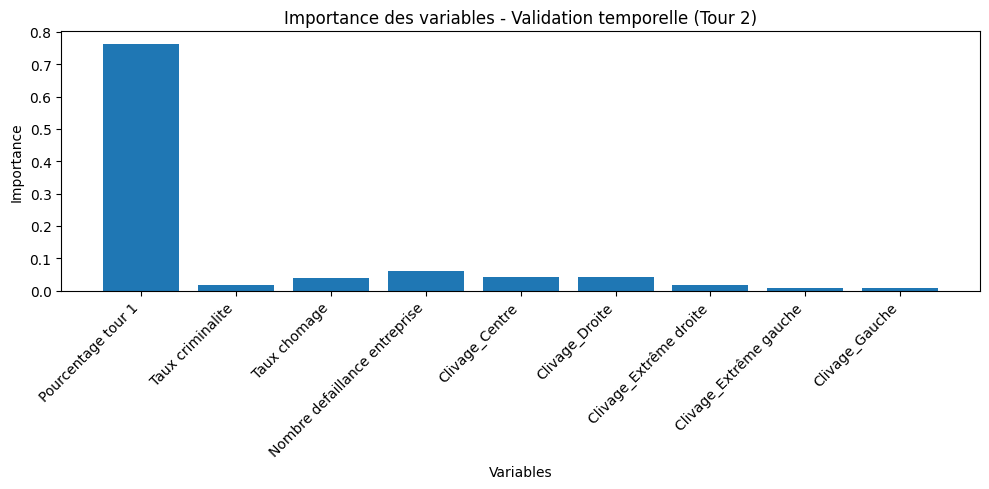

In [26]:
# Chargement des données
df = pd.read_csv("../data/merged_data/data_merged_by_year.csv", sep=",")

# Encodage One-Hot pour 'Clivage'
one_hot = OneHotEncoder()
clivage_encoded = one_hot.fit_transform(df['Clivage'].values.reshape(-1,1)).toarray()
categories = one_hot.categories_[0]
clivage_df = pd.DataFrame(clivage_encoded, columns = ["Clivage_"+str(category) for category in categories])
df = pd.concat([df, clivage_df], axis=1)

# VALIDATION TEMPORELLE - Prédiction Tour 2
print("🎯 VALIDATION TEMPORELLE - Prédiction Tour 2")
print("="*50)

# Même approche temporelle pour le tour 2
train_years = [1995, 2002, 2007, 2012, 2017]
test_year = 2022

df_train_t2 = df[df['Année'].isin(train_years)]
df_test_t2 = df[df['Année'] == test_year]

# Sélection des caractéristiques (avec pourcentage tour 1)
feature_cols_t2 = ['Pourcentage tour 1', 'Taux criminalite', 'Taux chomage', 'Nombre defaillance entreprise'] + list(clivage_df.columns)
X_train_t2 = df_train_t2[feature_cols_t2]
y_train_t2 = df_train_t2['Gagnant tour 2']
X_test_t2 = df_test_t2[feature_cols_t2]
y_test_t2 = df_test_t2['Gagnant tour 2']

print(f"📚 Entraînement Tour 2 sur: {train_years} ({len(df_train_t2)} observations)")
print(f"🧪 Test Tour 2 sur: {test_year} ({len(df_test_t2)} observations)")

# Création et entraînement du modèle tour 2
model_temporal_t2 = RandomForestClassifier(random_state=42, n_estimators=100)
model_temporal_t2.fit(X_train_t2, y_train_t2)

# Prédiction et évaluation
y_pred_temporal_t2 = model_temporal_t2.predict(X_test_t2)
accuracy_temporal_t2 = accuracy_score(y_test_t2, y_pred_temporal_t2)

print(f"🎯 Précision validation temporelle Tour 2: {accuracy_temporal_t2:.2f}")

# Validation croisée temporelle pour le tour 2
print("\n🔄 VALIDATION CROISÉE TEMPORELLE - Tour 2")
print("="*50)

temporal_scores_t2 = []
for i in range(len(years)-1):
    train_years_cv = years[:i+4] if i+4 < len(years) else years[:i+3]
    if len(train_years_cv) < 3:
        continue
    
    test_year_cv = years[i+3] if i+3 < len(years) else years[-1]
    
    if test_year_cv in train_years_cv:
        continue
    
    df_train_cv_t2 = df[df['Année'].isin(train_years_cv)]
    df_test_cv_t2 = df[df['Année'] == test_year_cv]
    
    if len(df_test_cv_t2) == 0:
        continue
    
    X_train_cv_t2 = df_train_cv_t2[feature_cols_t2]
    y_train_cv_t2 = df_train_cv_t2['Gagnant tour 2']
    X_test_cv_t2 = df_test_cv_t2[feature_cols_t2]
    y_test_cv_t2 = df_test_cv_t2['Gagnant tour 2']
    
    model_cv_t2 = RandomForestClassifier(random_state=42, n_estimators=100)
    model_cv_t2.fit(X_train_cv_t2, y_train_cv_t2)
    
    y_pred_cv_t2 = model_cv_t2.predict(X_test_cv_t2)
    score_t2 = accuracy_score(y_test_cv_t2, y_pred_cv_t2)
    temporal_scores_t2.append(score_t2)
    
    print(f"📅 Entraînement: {train_years_cv} → Test: {test_year_cv} → Précision: {score_t2:.2f}")

# Validation temporelle (Tour 2)
train_years = [1995, 2002, 2007, 2012, 2017]
test_year = 2022

df_train_t2 = df[df['Année'].isin(train_years)]
df_test_t2 = df[df['Année'] == test_year]

feature_cols_t2 = ['Pourcentage tour 1', 'Taux criminalite', 'Taux chomage', 'Nombre defaillance entreprise'] + list(clivage_df.columns)
X_train_t2 = df_train_t2[feature_cols_t2]
y_train_t2 = df_train_t2['Gagnant tour 2']
X_test_t2 = df_test_t2[feature_cols_t2]
y_test_t2 = df_test_t2['Gagnant tour 2']

model_temporal_t2 = RandomForestClassifier(random_state=42, n_estimators=100)
model_temporal_t2.fit(X_train_t2, y_train_t2)

y_pred_temporal_t2 = model_temporal_t2.predict(X_test_t2)
accuracy_temporal_t2 = accuracy_score(y_test_t2, y_pred_temporal_t2)
print(f"🎯 Précision validation temporelle (Tour 2): {accuracy_temporal_t2:.2f}")
print(classification_report(y_test_t2, y_pred_temporal_t2))

# Affichage d'un graphique d'accuracy pour la validation temporelle (Tour 2)
plt.figure(figsize=(4, 5))
plt.bar(['Validation temporelle (Tour 2)'], [accuracy_temporal_t2], color='lightgreen')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Précision - Validation temporelle (Tour 2)')
plt.text(0, accuracy_temporal_t2 + 0.02, f'{accuracy_temporal_t2:.2f}', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# Importance des variables (modèle temporel tour 2)
importances_t2 = model_temporal_t2.feature_importances_
feature_names_t2 = X_train_t2.columns
plt.figure(figsize=(10, 5))
plt.bar(feature_names_t2, importances_t2)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Importance des variables - Validation temporelle (Tour 2)')
plt.tight_layout()
plt.show()

## Conclusion

- La validation temporelle donne une estimation réaliste de la capacité du modèle à prédire une élection future.
- Les performances sont à interpréter avec prudence : le contexte politique et social évolue, mais cette approche évite toute fuite d'information.
- Les variables les plus importantes sont visualisées pour chaque tour.

**Prochaines étapes possibles :**
- Tester d'autres modèles (XGBoost, SVM...)
- Ingénierie de nouvelles variables
- Analyse d'erreurs par département
- Prédiction sur d'autres scrutins